In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/atulapra/Emotion-detection.git

Cloning into 'Emotion-detection'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 221 (delta 0), reused 0 (delta 0), pack-reused 217
Receiving objects: 100% (221/221), 16.07 MiB | 28.63 MiB/s, done.
Resolving deltas: 100% (102/102), done.


In [ ]:
%cd /content/Emotion-detection/src/

/content/Emotion-detection/src


In [ ]:
# !python emotions.py --mode train

# Own Methods

Setup Package & Dataset

In [ ]:
# %cd /content
# !unzip /content/drive/MyDrive/Emotion/data.zip
# !pip install scikit-plot

Load Packages

In [1]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix

Helper Function

In [32]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = [cv2.imread(path + image) for image in imagesList]
    return loadedImages

Generate X & Y Data for Training from images & label

In [33]:
total_X =[]
label= []

In [34]:
path = "/content/data/train/"
file_fearful 	  = path + 'fearful/'
file_neutral 	  = path + 'neutral/'
file_surprised 	= path + 'surprised/'
file_sad 	      = path + 'sad/'
file_disgusted 	= path + 'disgusted/'
file_happy 	    = path + 'happy/'
file_angry 	    = path + 'angry/'
file_image_fearful 	  = loadImages(file_fearful)
file_image_neutral 	  = loadImages(file_neutral)
file_image_surprised 	= loadImages(file_surprised)
file_image_sad 	      = loadImages(file_sad)
file_image_disgusted 	= loadImages(file_disgusted)
file_image_happy 	    = loadImages(file_happy)
file_image_angry 	    = loadImages(file_angry)
for i in range(len(file_image_fearful)):
	total_X.append(file_image_fearful[i])
	label.append('0')
for i in range(len(file_image_neutral)):
	total_X.append(file_image_neutral[i])
	label.append('1')
for i in range(len(file_image_surprised)):
	total_X.append(file_image_surprised[i])
	label.append('2')
for i in range(len(file_image_sad)):
	total_X.append(file_image_sad[i])
	label.append('3')
for i in range(len(file_image_disgusted)):
	total_X.append(file_image_disgusted[i])
	label.append('4')
for i in range(len(file_image_happy)):
	total_X.append(file_image_happy[i])
	label.append('5')
for i in range(len(file_image_angry)):
	total_X.append(file_image_angry[i])
	label.append('6')

In [35]:
path = "/content/data/test/"
file_fearful 	  = path + 'fearful/'
file_neutral 	  = path + 'neutral/'
file_surprised 	= path + 'surprised/'
file_sad 	      = path + 'sad/'
file_disgusted 	= path + 'disgusted/'
file_happy 	    = path + 'happy/'
file_angry 	    = path + 'angry/'
file_image_fearful 	  = loadImages(file_fearful)
file_image_neutral 	  = loadImages(file_neutral)
file_image_surprised 	= loadImages(file_surprised)
file_image_sad 	      = loadImages(file_sad)
file_image_disgusted 	= loadImages(file_disgusted)
file_image_happy 	    = loadImages(file_happy)
file_image_angry 	    = loadImages(file_angry)
for i in range(len(file_image_fearful)):
	total_X.append(file_image_fearful[i])
	label.append('0')
for i in range(len(file_image_neutral)):
	total_X.append(file_image_neutral[i])
	label.append('1')
for i in range(len(file_image_surprised)):
	total_X.append(file_image_surprised[i])
	label.append('2')
for i in range(len(file_image_sad)):
	total_X.append(file_image_sad[i])
	label.append('3')
for i in range(len(file_image_disgusted)):
	total_X.append(file_image_disgusted[i])
	label.append('4')
for i in range(len(file_image_happy)):
	total_X.append(file_image_happy[i])
	label.append('5')
for i in range(len(file_image_angry)):
	total_X.append(file_image_angry[i])
	label.append('6')

In [38]:
total_X = np.asarray(total_X)
label = np.asarray(label)

label = to_categorical(label)

Split Dataset with ratio 70:30 

In [39]:
# split
X_train, X_test, y_train, y_test = train_test_split(total_X, label, test_size=0.3, random_state=1)

Model VGG16 + Pretrained Model

In [71]:
# model 
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D() (x)

x = Dense(100, activation='relu') (x)
x = Dropout(0.15) (x)
x = Dense(60, activation='relu') (x)
x = Dense(30, activation='relu') (x)

predictions = Dense(7, activation='softmax')(x)

In [72]:
for layer in base_model.layers:
    layer.trainable = False

model = Model(inputs=base_model.input, outputs=predictions)
model.compile (loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model Architecture

In [73]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

Training Model with 50 Epochs

In [74]:
history=model.fit (X_train, y_train, epochs=50, batch_size=50, verbose=1,validation_data=(X_test, y_test))

Epoch 1/50
951/951 [==============================] - 56s 27ms/step - loss: 1.9109 - accuracy: 0.2958 - val_loss: 1.6410 - val_accuracy: 0.3349
Epoch 2/50
951/951 [==============================] - 24s 25ms/step - loss: 1.6143 - accuracy: 0.3537 - val_loss: 1.5900 - val_accuracy: 0.3665
Epoch 3/50
951/951 [==============================] - 24s 25ms/step - loss: 1.5456 - accuracy: 0.3914 - val_loss: 1.5343 - val_accuracy: 0.3991
Epoch 4/50
951/951 [==============================] - 24s 25ms/step - loss: 1.4845 - accuracy: 0.4232 - val_loss: 1.4791 - val_accuracy: 0.4281
Epoch 5/50
951/951 [==============================] - 24s 25ms/step - loss: 1.4326 - accuracy: 0.4494 - val_loss: 1.4538 - val_accuracy: 0.4385
Epoch 6/50
951/951 [==============================] - 24s 25ms/step - loss: 1.3806 - accuracy: 0.4722 - val_loss: 1.4313 - val_accuracy: 0.4476
Epoch 7/50
951/951 [==============================] - 24s 25ms/step - loss: 1.3363 - accuracy: 0.4908 - val_loss: 1.4156 - val_accuracy:

Plot Accuracy & Loss

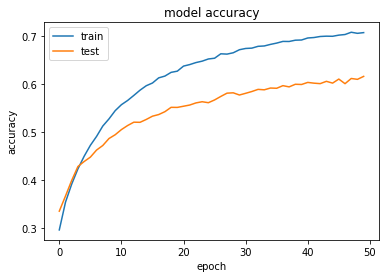

In [76]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

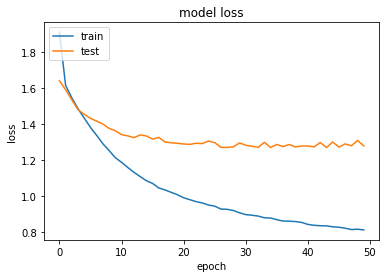

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test Model with y_test

In [79]:
pred = model.predict(X_test)

In [85]:
prediction = [np.argmax(x) for x in pred]

In [87]:
true_label = [np.argmax(x) for x in y_test]

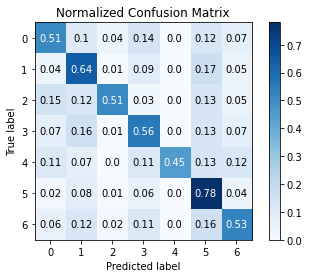

In [103]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(true_label, prediction, normalize=True)
plt.show ()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'True Label')

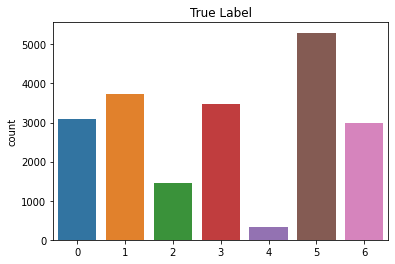

In [108]:
sns.countplot(true_label).set_title("True Label")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Prediction Label')

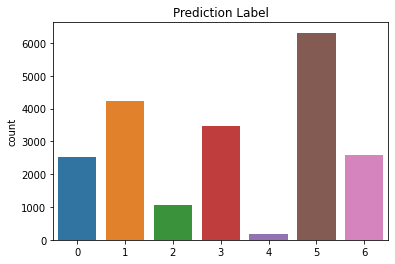

In [109]:
sns.countplot(prediction).set_title("Prediction Label")

Test Model with Images

In [112]:
classes = listdir(path) # ['fearful', 'neutral', 'surprised', 'sad', 'disgusted', 'happy', 'angry']

In [110]:
true_label[:10]

[5, 1, 0, 2, 5, 1, 1, 3, 0, 5]

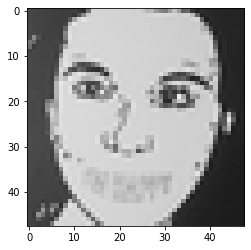

In [113]:
plt.imshow(Image.fromarray(X_test[0]))

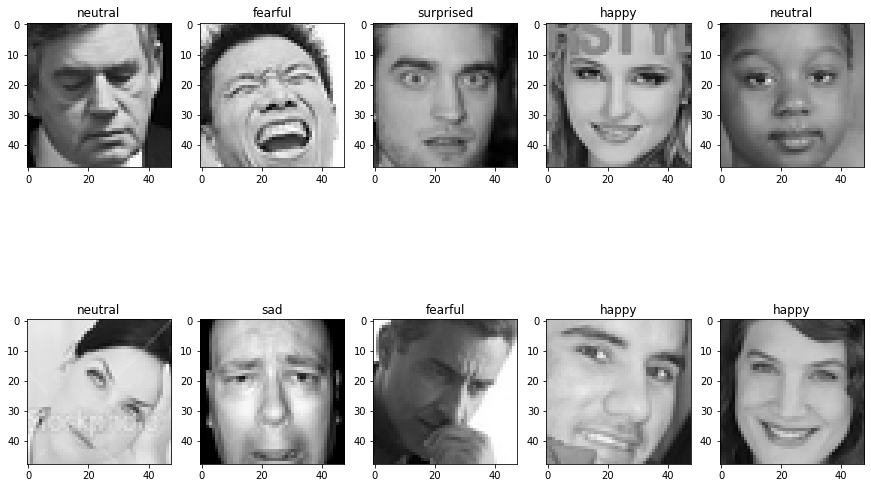

In [120]:
w = 15
h = 15
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image.fromarray(X_test[i]))
    plt.title(classes[true_label[i]])
plt.show()

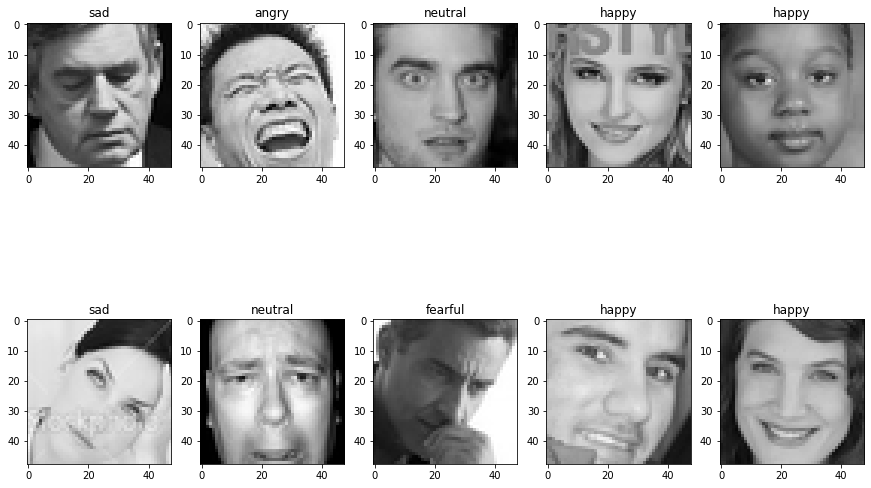

In [121]:
w = 15
h = 15
fig = plt.figure(figsize=(15, 10))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(Image.fromarray(X_test[i]))
    plt.title(classes[prediction[i]])
plt.show()

Save Model

In [104]:
model.save('model_first.h5')